# Rede Neural

In [19]:
import pandas as pd
from imblearn.over_sampling import ADASYN
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict

In [2]:
data = pd.read_csv('data_root/dataframe.csv')
data = data[['idade', 'classe_trabalhadora', 'ocupacao',
       'numero_educacional', 'relacionamento_traduzido', 'raca', 'pais_natal',
       'horas_por_semana', 'renda', 'genero']]
data

,idade,classe_trabalhadora,ocupacao,numero_educacional,relacionamento_traduzido,raca,pais_natal,horas_por_semana,renda,genero
0,25,5,6,7,1,2,38,40,0,0
1,38,5,1,9,2,1,38,50,0,0
2,28,4,9,12,2,1,38,40,1,0
3,44,5,6,10,2,2,38,40,1,0
4,34,5,7,6,3,1,38,30,0,0
...,...,...,...,...,...,...,...,...,...,...
35631,43,5,13,11,2,1,38,45,0,0
35632,32,5,11,14,3,0,35,11,0,0
35633,53,5,3,14,2,1,38,40,1,0
35634,27,5,11,12,0,1,38,38,0,1


In [3]:
# Definindo as variáveis de entrada (features) e saída (renda)
X = data.drop('renda', axis=1)
y = data['renda']

### Undersampling

In [71]:
from sklearn.utils import resample

# Identificar as classes majoritária e minoritária
majority_class = y.value_counts().idxmax()
minority_class = y.value_counts().idxmin()

# Obter índices das classes
majority_indices = y[y == majority_class].index
minority_indices = y[y == minority_class].index

# Realizar undersampling na classe majoritária
undersampled_majority_indices = resample(
    majority_indices, 
    n_samples=len(minority_indices), 
    random_state=42
)

# Combinar os índices das classes
final_indices = undersampled_majority_indices.tolist() + minority_indices.tolist()

# Criar os novos datasets
undersampled_X_train = X.loc[final_indices]
undersampled_y_train = y.loc[final_indices]


In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(undersampled_X_train)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, undersampled_y_train, test_size=0.2, random_state=42) # 80% treino, 20% teste

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Construir a rede neural
model = Sequential([
    Dense(256, activation='elu', input_shape=(X_train.shape[1],)),  # Regularização
    Dense(128, activation='elu'),  # Camada intermediária
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1, activation='sigmoid')  # Camada de saída para classificação binária
])

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.005), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Prever com novos dados
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)


Epoch 1/50
443/443 [==============================] - 2s 3ms/step - loss: 0.5163 - accuracy: 0.7513 - val_loss: 0.5109 - val_accuracy: 0.7414
Epoch 2/50
443/443 [==============================] - 1s 3ms/step - loss: 0.4940 - accuracy: 0.7641 - val_loss: 0.4685 - val_accuracy: 0.7809
Epoch 3/50
443/443 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.7785 - val_loss: 0.4973 - val_accuracy: 0.7753
Epoch 4/50
443/443 [==============================] - 1s 3ms/step - loss: 0.4719 - accuracy: 0.7791 - val_loss: 0.4831 - val_accuracy: 0.7747
Epoch 5/50
443/443 [==============================] - 1s 3ms/step - loss: 0.4673 - accuracy: 0.7832 - val_loss: 0.4602 - val_accuracy: 0.7857
Epoch 6/50
443/443 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.7843 - val_loss: 0.4744 - val_accuracy: 0.7840
Epoch 7/50
443/443 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.7891 - val_loss: 0.4673 - val_accuracy: 0.7826
Epoch 

In [75]:
#Configuração da Matriz de Confusão de Métricas
report = classification_report(y_test, binary_predictions, output_dict=True)     #Converte a matriz de confusão em um dicionário
df_report = pd.DataFrame(report)    #Converte em um Dataframe para melhor visualização
df_report

,0,1,accuracy,macro avg,weighted avg
precision,0.853545,0.745204,0.791361,0.799375,0.800445
recall,0.713178,0.872696,0.791361,0.792937,0.791361
f1-score,0.777074,0.803927,0.791361,0.790500,0.790235
support,1806.000000,1736.000000,0.791361,3542.000000,3542.000000


### ADASYN - Modelo Escolido

In [4]:
# Assuming X_train and y_train are your feature and target arrays
adasyn = ADASYN(random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(X, y)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_resampled)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42) # 80% treino, 20% teste

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Dense(256, activation='elu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/50
1338/1338 [==============================] - 4s 3ms/step - loss: 0.3795 - accuracy: 0.8298 - val_loss: 0.4300 - val_accuracy: 0.8100
Epoch 2/50
1338/1338 [==============================] - 4s 3ms/step - loss: 0.3785 - accuracy: 0.8307 - val_loss: 0.4285 - val_accuracy: 0.8109
Epoch 3/50
1338/1338 [==============================] - 4s 3ms/step - loss: 0.3772 - accuracy: 0.8305 - val_loss: 0.4311 - val_accuracy: 0.8107
Epoch 4/50
1338/1338 [==============================] - 4s 3ms/step - loss: 0.3758 - accuracy: 0.8315 - val_loss: 0.4364 - val_accuracy: 0.8078
Epoch 5/50
1338/1338 [==============================] - 4s 3ms/step - loss: 0.3744 - accuracy: 0.8312 - val_loss: 0.4309 - val_accuracy: 0.8095
Epoch 6/50
1338/1338 [==============================] - 4s 3ms/step - loss: 0.3732 - accuracy: 0.8328 - val_loss: 0.4331 - val_accuracy: 0.8078
Epoch 7/50
1338/1338 [==============================] - 4s 3ms/step - loss: 0.3730 - accuracy: 0.8322 - val_loss: 0.4341 - val_accuracy:

In [14]:
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

335/335 [==============================] - 1s 2ms/step


In [15]:
report = classification_report(y_test, binary_predictions, output_dict=True)
df_report = pd.DataFrame(report)
df_report

,0,1,accuracy,macro avg,weighted avg
precision,0.873876,0.761765,0.809533,0.817821,0.818837
recall,0.731412,0.890539,0.809533,0.810975,0.809533
f1-score,0.796322,0.821134,0.809533,0.808728,0.808503
support,5447.000000,5253.000000,0.809533,10700.000000,10700.000000


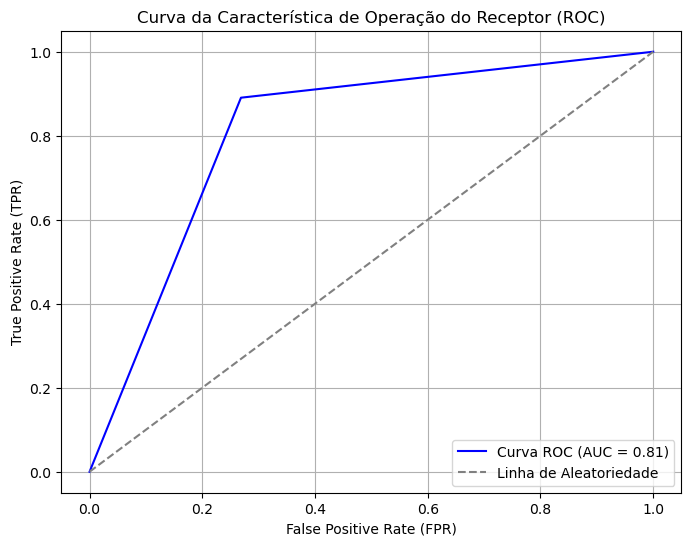

In [16]:
# Calcular os valores FPR, TPR e os thresholds
fp, tp, thresholds = roc_curve(y_test, binary_predictions)

# Calcular a AUC
roc_auc = auc(fp, tp)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fp, tp, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Linha de Aleatoriedade')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva da Característica de Operação do Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<Axes: >

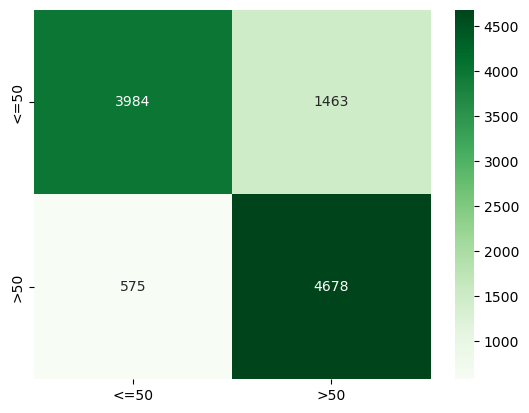

In [20]:
conf_matrix_houldout = confusion_matrix(y_test, binary_predictions)

lbl1_cross = ['<=50', '>50']
lbl2_cross = ['<=50', '>50']
sns.heatmap(conf_matrix_houldout, annot=True, fmt='d', cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

### TEstes

In [ ]:
# Assuming X_train and y_train are your feature and target arrays
adasyn = ADASYN(random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(X, y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42) # 80% treino, 20% teste

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Construir a rede neural
model = Sequential([
    Dense(512, activation='elu', input_shape=(X_train.shape[1],)),  # Regularização
    Dense(256, activation='elu'),  # Camada intermediária
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1, activation='sigmoid')  # Camada de saída para classificação binária
])

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Prever com novos dados
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)


Epoch 1/50
1338/1338 [==============================] - 8s 5ms/step - loss: 0.4754 - accuracy: 0.7776 - val_loss: 0.4573 - val_accuracy: 0.7912
Epoch 2/50
1338/1338 [==============================] - 7s 6ms/step - loss: 0.4548 - accuracy: 0.7922 - val_loss: 0.4543 - val_accuracy: 0.7922
Epoch 3/50
1338/1338 [==============================] - 6s 5ms/step - loss: 0.4501 - accuracy: 0.7953 - val_loss: 0.4565 - val_accuracy: 0.7915
Epoch 4/50
1338/1338 [==============================] - 6s 5ms/step - loss: 0.4469 - accuracy: 0.7961 - val_loss: 0.4509 - val_accuracy: 0.7939
Epoch 5/50
1338/1338 [==============================] - 6s 5ms/step - loss: 0.4449 - accuracy: 0.7979 - val_loss: 0.4479 - val_accuracy: 0.7980
Epoch 6/50
1338/1338 [==============================] - 6s 5ms/step - loss: 0.4425 - accuracy: 0.7984 - val_loss: 0.4491 - val_accuracy: 0.7938
Epoch 7/50
1338/1338 [==============================] - 6s 5ms/step - loss: 0.4406 - accuracy: 0.8000 - val_loss: 0.4489 - val_accuracy:

In [89]:
#Configuração da Matriz de Confusão de Métricas
report = classification_report(y_test, binary_predictions, output_dict=True)     #Converte a matriz de confusão em um dicionário
df_report = pd.DataFrame(report)    #Converte em um Dataframe para melhor visualização
df_report

,0,1,accuracy,macro avg,weighted avg
precision,0.873613,0.765525,0.811963,0.819569,0.820549
recall,0.737287,0.889397,0.811963,0.813342,0.811963
f1-score,0.799681,0.822825,0.811963,0.811253,0.811043
support,5447.000000,5253.000000,0.811963,10700.000000,10700.000000
